# SYSC4906 Introduction to Machine Learning
## Assignment 1
|**Student name** | **Student number**|
|-----------------|-------------------|
| Igor Veselinovic | 101011081 |

# Question 1
Calculate the gradient of the following function: 
$$ f(x,z) \stackrel{\text{def}}{=} \sqrt{5x^3 + z^2 + 4xz + 11x + 5} $$


$$ \triangledown f(x,z)= \begin{cases}{\partial{f(x,z)} \over \partial{x}} \\{\partial{f(x,z)} \over \partial{z}}\end{cases} $$

$$ {\partial{f(x,z)} \over \partial{x}}= \frac{1}{2}*(5x^3 + z^2 +4xz +11x + 5)^{-\frac{1}{2}}*(15x^2 + 4z + 11) = {15x^2 + 4z + 11 \over 2 \sqrt{5x^3 + z^2 + 4xz + 11x + 5}} $$

$$ {\partial{f(x,z)} \over \partial{z}}= \frac{1}{2}*(5x^3 + z^2 +4xz +11x + 5)^{-\frac{1}{2}}*(2z + 4x) = {z + 2x \over  \sqrt{5x^3+z^2+4xz+11x+5}} $$

$$ \boxed{\therefore \triangledown f(x,z)= \begin{cases}{\partial{f(x,z)} \over \partial{x}} = {15x^2 + 4z + 11 \over 2 \sqrt{5x^3 + z^2 + 4xz + 11x + 5}} \\{\partial{f(x,z)} \over \partial{z}} = {z + 2x \over  \sqrt{5x^3+z^2+4xz+11x+5}}\end{cases} }$$

#Question 2

Create a python notebook which loads the sklearn breast cancer dataset (see sklearn.datasets.load_breast_cancer). This dataset has 2 classes of breast tumor biopsies: malignant (target=0) and benign (target=1). There are 569 samples (357 benign, 212 malignant) with 30 features each. 

    a) Split the data, using 75% for training and 25% for test. Make sure you use stratified sampling. 
    b) Train and test a logistic regression classifier. How accurate is your classifier?
    c) Repeat part b), but using only the first two features from the dataset. Was the classifier accuracy impacted?
    d) Using the (two feature) classifier from part c), create two subplots using the first two features from the data set. 
        i)  On the first, plot the decision boundary and the training data. Use green for malignant (target==0) and blue for benign (target==1).
        ii) On the second, plot the decision boundary and the test data. Use the same colours (blue/green), but highlight all misclassified test points (from either class) in red.



In [0]:
# Load libraries...
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np
from numpy import linalg

## Q2.a) Create the dataset

The first step is loading the breast cancer data. We will then split off the test data to be used for all training sets. Then create each training set, using **stratified sampling**

load_breast_cancer returns a Dictionary-like object, the interesting attributes are: 
* ‘data’, the data to learn, 
* ‘target’, the classification labels, 
* ‘target_names’, the meaning of the labels, 
* ‘feature_names’, the meaning of the features, and 
* ‘DESCR’, the full description of the dataset,

In [0]:
# Load the breast cancer dataset
bcData = load_breast_cancer()
X = bcData.data
y = bcData.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    train_size=0.75, stratify=y,
                                                    random_state=0)

# Q2.b) Train and test a logistic regression classifier
The logistic regression classifier that gets built with the dataset is very accurate (>90% accuracy).

In [25]:
classifier = LogisticRegression(solver="liblinear").fit(X_train, y_train)
print("The 30 feature classifier got an accuracy score of:", classifier.score(X_test, y_test))

The 30 feature classifier got an accuracy score of: 0.9370629370629371


# Q2.c) Train and test with only 2 features
I reduced the dimensionality of the feature vectors down to 2 and then built a new logistic regression classifier. When testing this classifier, it scored lower than the classifier built with 30 features, however not by a significant amount.

In [26]:
X_train_2f = X_train[:, :2]
X_test_2f = X_test[:, :2]

classifier_two_features = LogisticRegression(solver="liblinear").fit(X_train_2f, y_train)
print("The 2 feature classifier got an accuracy score of:", classifier_two_features.score(X_test_2f, y_test))

The 2 feature classifier got an accuracy score of: 0.8811188811188811


# Q2.d) Plot 2 feature classifier
Plotting the decision boundary on the training data shows that the logistic regression classifier was not able to completely separate the two classes of examples.

Plotting the decision boundary on the test data shows where and how frequently the classifier mislabels test data points.

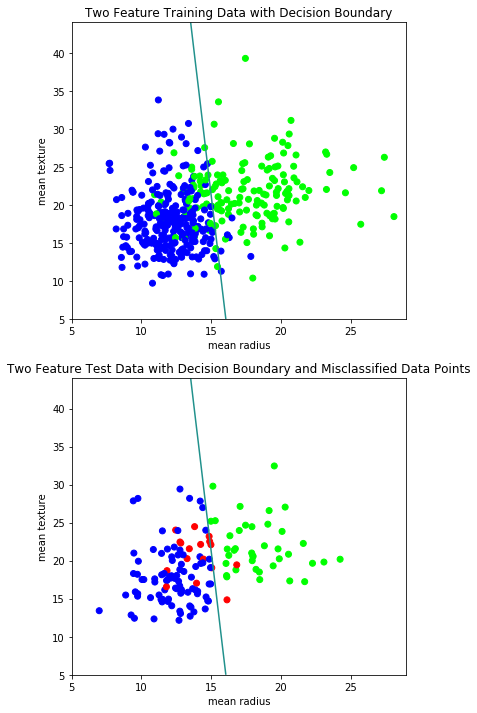

In [27]:
train_f1 = [x[0] for x in X_train_2f]
train_f2 = [x[1] for x in X_train_2f]
test_f1 = [x[0] for x in X_test_2f]
test_f2 = [x[1] for x in X_test_2f]

cm_train = ListedColormap(['#00FF00', '#0000FF'])
cm_test = ListedColormap(['#00FF00', '#0000FF', '#FF0000'])

xx, yy = np.mgrid[5:30, 5:45]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier_two_features.predict_proba(grid)[:, 1].reshape(xx.shape)

f, axs = plt.subplots(2, figsize=(6,12))

# Plot decision boundary with training data
axs[0].contour(xx, yy, probs, levels=[0.5], vmin=0, vmax=1)
axs[0].scatter(train_f1, train_f2, c=y_train, cmap=cm_train)
axs[0].set(xlabel=bcData.feature_names[0], ylabel=bcData.feature_names[1])
axs[0].set_title("Two Feature Training Data with Decision Boundary")


# Plot decision boundary with test data
misclassifications = np.where(y_test != classifier_two_features.predict(X_test_2f))
labels = y_test.copy()
for ms in misclassifications:
  labels[ms] = 2
axs[1].contour(xx, yy, probs, levels=[0.5], vmin=0, vmax=1)
axs[1].scatter(test_f1, test_f2, c=labels, cmap=cm_test)
axs[1].set(xlabel=bcData.feature_names[0], ylabel=bcData.feature_names[1])
axs[1].set_title("Two Feature Test Data with Decision Boundary and Misclassified Data Points")

f.show()


# Question 3

Linear regression. Download the file “Assig1Q3.csv” from CULearn under “Assignments”. The first column represents the X values, while the second column represents the Y values.
* Plot the data

We are going to use linear regression to fit a linear and a quadratic model to these data. Without using sklearn.linear_model (or any other linear regression libraries), write your own python code to implement the least squares solution for linear regression. That is:
$$\beta=(X^TX)^{−1}X^Ty$$

* Assuming the model , use your code to best-fit the parameters m and b to the data. Report your optimal parameter values. 
*Hints: 
    * recall that you must create the ‘augmented’ feature vector X from the given x data (add a column of 1’s). 
    * look at numpy.T(), numpy.matmul(), numpy.dot(), and numpy.linalg.inv()
* Plot your line of best fit on top of the data
* Calculate the sum of square residuals, or mean squared error, as in:
$$MSE(\beta) = \sum_{i=1}^{N}{(y−X\beta)^2}$$
* Assuming the model , repeat steps 2-4 using this new model (i.e. estimate the optimal values for a,b,c; report those estimates; plot the line of best fit; report the MSE).
* Briefly discuss which model would you prefer for these data?
* Why is best-fitting the second (quadratic) model still considered linear regression?



## Step 1: Load the CSV file

In [0]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment1/Assig1Q3.csv', header=None)

## Step 2: Linear model y=mx+b
The linear regression model calculated and shown below appears to **underfit** the data. There are many data points that are very far from the line of best fit, leading to a large MSE. Underfitting can be fixed by adding more features to our data or by making the model more complex, the latter of which is shown in the next step.

m = 1.9098720420505146
b = -4.460975471665963
MSE = 5.403948277421324


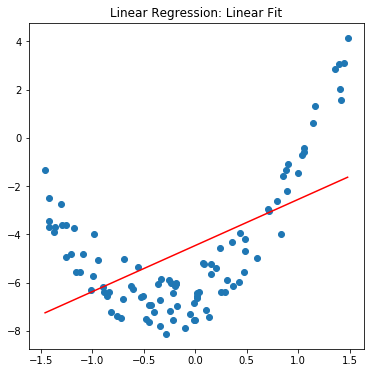

In [29]:
# Augment the x vector
x = data.values[:, 0]
y = data.values[:, 1]
aug_x = np.column_stack((np.ones(len(x)), x))

# Compute beta
tmp_mat = aug_x.T.dot(aug_x)
tmp_mat = linalg.inv(tmp_mat)
beta = tmp_mat.dot(aug_x.T).dot(y)
b, m = beta
print("m =", m)
print("b =", b)

# Plot the line of best fit
f = plt.figure(figsize=(6, 6))
plt.scatter(x, y)
xx = np.linspace(min(x), max(x), 1000)
plt.plot(xx, m * xx + b, c="#FF0000")
plt.title("Linear Regression: Linear Fit")
f.show()

# Compute the MSE
mse = np.mean((m * x + b - y) ** 2)
print("MSE =", mse)

## Step3: Quadratic model y=ax^2+bx+c
The linear regression model using a quadratic equation is calculated and show below and it appears to fit the data well.  
I would prefer to use this model for this dataset because it has a far lower MSE (0.568 < 5.40) and the visualization clearly shows a better fit.  
Best-fitting with a quadratic model is still considered linear regression because the linearity of these models refers to the parameters/coefficients (i.e, beta) rather than the variables.

a =  3.23704497990742
b =  2.1672533520196366
c =  -6.534142400783999
MSE = 0.5683137448906698


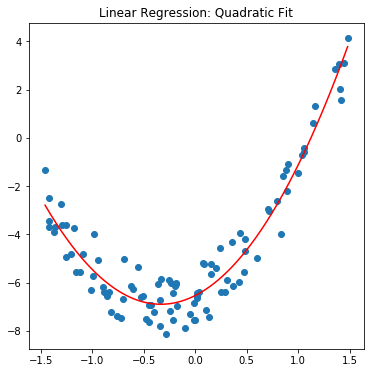

In [30]:
# Augment the x vector
aug_x = np.column_stack((np.ones(len(x)), x, x ** 2))

# Compute beta
tmp_mat = aug_x.T.dot(aug_x)
tmp_mat = linalg.inv(tmp_mat)
beta = tmp_mat.dot(aug_x.T).dot(y)
c, b, a = beta
print("a = ", a)
print("b = ", b)
print("c = ", c)

# Plot the line of best fit
f = plt.figure(figsize=(6, 6))
plt.scatter(x, y)
xx = np.linspace(min(x), max(x), 1000)
plt.plot(xx, a * xx ** 2 + b * xx + c, c="#FF0000")
plt.title("Linear Regression: Quadratic Fit")
f.show()

# Compute the MSE
mse = np.mean((a * x ** 2 + b * x + c - y) ** 2)
print("MSE =", mse)

# Question 4

- Create a Jupyter Notebook based on Lecture5.ipynb to use make_classification to create a linearly separable dataset, with 2 classes, 2 informative features, 1000 samples per class, using a class_sep=2.0, and a random_state of 3. 
- Generate some random noise of the same shape as your feature data, drawn from a standard normal distribution (see numpy.random) and a random_state of 2. 
- Create four datasets: 
    1. no noise, 
    2. data + 0.5 * noise, 
    3. data + 1.0 * noise, 
    4. data + 2.0 * noise. 
- i) For all four datasets, plot the data, labelling each (sub)plot by the degree of noise added (i.e. 0, 0.5, 1.0, and 2.0)
- ii) For each dataset, create training and test data using a 70/30 train/test split (see train_test_split).
- iii) For each dataset, train and test an SVM classifier with a polynomial kernel with degree=2, and C=1.0. Report the test score for each. How does prediction accuracy change with noise level?
- iv) For a noise level of 0.5, train and test SVM classifiers using the following values for C: {0.001, 0.01, 0.1, 1, 10, 100}. 
   - Report the test accuracy for each. 
   - How does performance vary with C?
   - Briefly describe what the C controls for sklearn.svc. *Hint: look at the documentation for sklearn.svc rather than the class notes here...*


# Q4.i)
The increasing amounts of noise can be seen to create more overlap between the two classes of data points. Also, the added noise leads to more outliers.

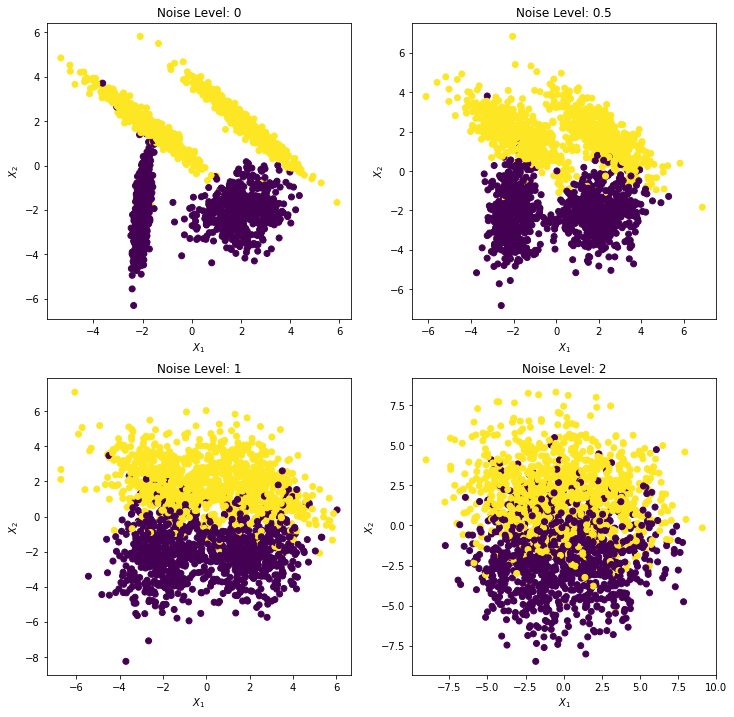

In [31]:
# Load the required libraries...
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from numpy import random

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_classes=2, n_samples=2000, class_sep=2.0,
                           random_state=3)

rng = np.random.RandomState(2)

Xs = {}
Xs[0] = X
Xs[0.5] = X + 0.5 * rng.normal(size=X.shape)
Xs[1] = X + 1 * rng.normal(size=X.shape)
Xs[2] = X + 2 * rng.normal(size=X.shape)

f = plt.figure(figsize=(12, 12))

i = 1
for key in Xs:
  p = plt.subplot(2, 2, i)
  p.scatter(Xs[key][:, 0], Xs[key][:, 1], c=y)
  p.set(xlabel="$X_1$", ylabel="$X_2$", title="Noise Level: "+str(key))
  i += 1
  
f.show()
  

# Q4.ii & iii)
Prediction accuracy does not appear to be affected by noise level based on the experiment and results below. The model performs very poorly (50% accuracy, equivalent to random guessing) with all 4 noise levels (even with no noise), so there seem to be issues with some of the model's hyperparameters.

In [32]:
for key in Xs:
  # Split each dataset into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
  
  # Train and test an SVM for each dataset
  classifier = SVC(C=1.0, kernel="poly", degree=2, gamma="auto").fit(X_train, y_train)
  score = classifier.score(X_test, y_test)
  print("The classifier with {} degree(s) of noise got an accuracy score of: {}".format(key, score))

The classifier with 0 degree(s) of noise got an accuracy score of: 0.51
The classifier with 0.5 degree(s) of noise got an accuracy score of: 0.56
The classifier with 1 degree(s) of noise got an accuracy score of: 0.5133333333333333
The classifier with 2 degree(s) of noise got an accuracy score of: 0.5316666666666666


# Q4.iv)
Prediction accuracy appears to go up significantly when increasing C from 0.001 to 0.01. Any further increases of C don't seem to have much, if any, impact on performance, based on the experiment and results below.   
For sklearn.svc, C represents a **hyperparameter** that scales the penalty for classification errors.


In [33]:
X_train, X_test, y_train, y_test = train_test_split(Xs[0.5], y, test_size=0.3, train_size=0.7)

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
  classifier = SVC(C=c, gamma="auto").fit(X_train, y_train)
  score = classifier.score(X_test, y_test)
  print("The classifier with C={} got an accuracy score of: {}".format(c, score))
  

The classifier with C=0.001 got an accuracy score of: 0.4766666666666667
The classifier with C=0.01 got an accuracy score of: 0.9666666666666667
The classifier with C=0.1 got an accuracy score of: 0.9716666666666667
The classifier with C=1 got an accuracy score of: 0.9733333333333334
The classifier with C=10 got an accuracy score of: 0.9733333333333334
The classifier with C=100 got an accuracy score of: 0.9733333333333334
